In [156]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

In [157]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'
df = pd.read_csv(path)

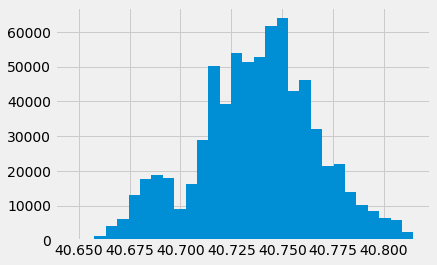

In [158]:
df.loc[df['start station latitude'] < 43, 'start station latitude'].hist(bins=30)

In [159]:
mask = df['birth year'].between(1918, 2018)

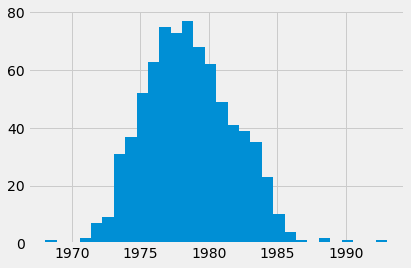

In [160]:
year_distr = df[mask].groupby('start station id')['birth year'].mean()
year_distr.hist(bins=30)

## Distributions

In [48]:
sample = pd.np.random.uniform(size=(100_000, 100))

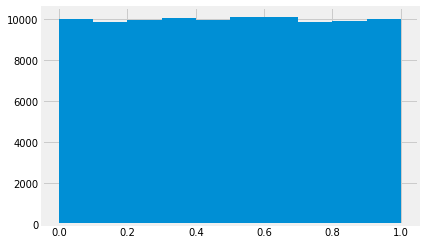

In [49]:
pd.Series(sample[:, 0]).hist()

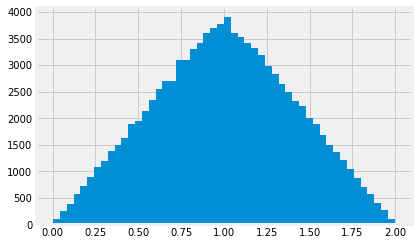

In [68]:
# summ of N samples
N = 2
pd.Series(pd.np.sum(sample[:, :N], axis=1)).hist(bins=50)

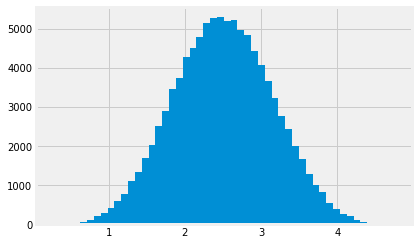

In [65]:
# summ of N samples
N = 5
pd.Series(pd.np.sum(sample[:, :N], axis=1)).hist(bins=50)

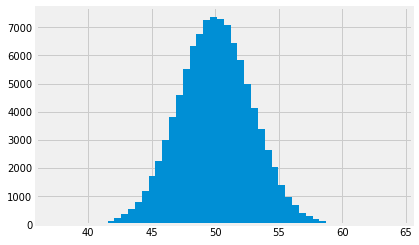

In [69]:
# summ of N samples
N = 100
pd.Series(pd.np.sum(sample[:, :N], axis=1)).hist(bins=50)

# Центрально-предельная теорема (Ц.П.Т, central limit theorem)

${\displaystyle {\sqrt {n}}{\frac {{\bar {X}}_{n}-\mu }{\sigma }}\to N(0,1)}$

Сумма большого числа как угодно распределенных независимых случайных величин распределена асимптотически нормально, если только слагаемые вносят равномерно малый вклад в сумму.ь

# Нормальное распределение (Распределение Гаусса)

формула плотности вероятностей:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}},}$

In [75]:
from math import e, pi, sqrt

In [126]:
def gauss(x, mean=0, distr=1):
    pass  # pass your code here
    

In [89]:
X = range(-300, 301)
y = [gauss(el/100) for el in X]

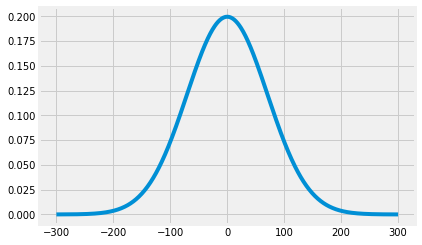

In [127]:
plt.plot(X, y)

### правильный подход

In [91]:
from scipy.stats import norm

In [121]:
# summ of N samples
N = 50
values = pd.Series(pd.np.sum(sample[:, :N], axis=1))

In [134]:
print(values.mean(), values.std())

25.004954409849258 2.047661460854196


In [123]:
mean, std = norm.fit(values)

In [135]:
mean, std

(25.004954409849258, 2.0476512225212957)

In [187]:
x = pd.np.linspace(mean - 3*std,
                   mean + 3*std, 100)

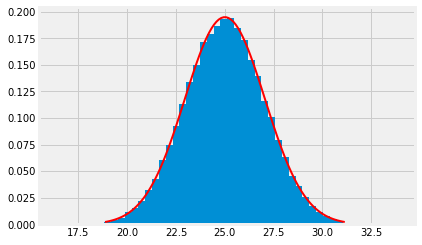

In [125]:
ax = values.hist(bins=50, density=True)
ax.plot(x, norm.pdf(x, loc=mean, scale=std), color='red', lw=2, label='distribution')

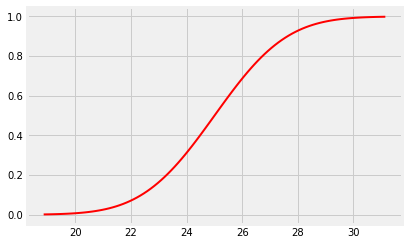

In [129]:
plt.plot(x, norm.cdf(x, loc=mean, scale=std), color='red', lw=2, label='distribution')

 - обратная операция, значение для 95% вероятности

In [131]:
norm.ppf(.95, loc=mean, scale=std)

28.37304094994503

# Confidence interval

 - интервал, внутри которого с достаточной вероятностью будет находится случайная величина, принадлежащая распределению

### Для нормального распределения этот интервал:

| Confidence Interval | Z     |
|---------------------|-------|
| 80%                 | 1.282 |
| 85%                 | 1.440 |
| 90%                 | 1.645 |
| 95%                 | 1.96  |
| 99%                 | 2.276 |
| 99.5%               | 2.807 |
| 99.9%               | 3.291 |

Где Z - мультипликатор стандартной девиации

**посчитайте интервал 95% для распределения средних годов по станциям**

In [161]:
# year_distr

In [167]:
# your code
min_bound, max_bound = 1975, 1985  # неправильно

**теперь давайте покажем его на графике**

In [185]:
x2 = pd.np.linspace(1960, 2000, 80)

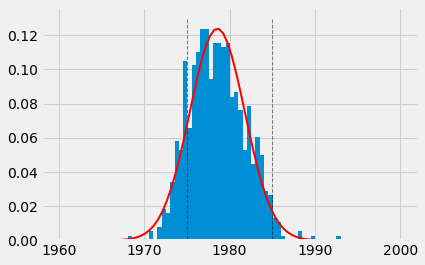

In [186]:
ax = year_distr.hist(bins=50, density=True)
ax.plot(x2, norm.pdf(x2, loc=year_distr.mean(), scale=year_distr.std()), color='red', lw=2, label='distribution')
ax.vlines([min_bound, max_bound], ymin=0, ymax=.13, lw=1, alpha=.5,  linestyle='--')

## В общем виде

In [179]:
norm.interval(0.95, loc=year_distr.mean(), scale=year_distr.std())

(1972.2472522828411, 1984.8695779013665)

# Распределение Стьюдента

In [183]:
from scipy.stats import t
df = 5  # hyperparameter

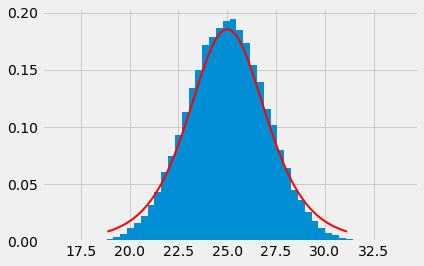

In [188]:
ax = values.hist(bins=50, density=True)
ax.plot(x, t.pdf(x, loc=mean, scale=std, df=df), color='red', lw=2, label='distribution')